In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/bhushan/Desktop/venv/Chennai Water Quality 02/Data/outputog.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1403 non-null   int64  
 1   D.O. mg/L                       1403 non-null   float64
 2   pH                              1403 non-null   float64
 3   Conductivity m mhos/cm          1403 non-null   float64
 4   BOD at 27C mg/L                 1403 non-null   float64
 5   Nitrate mg/L                    1403 non-null   float64
 6   Nitrite mg/L                    1403 non-null   float64
 7   Fecal Coliform MPN/100ml        1403 non-null   float64
 8   Total Coliform MPN/100ml        1403 non-null   float64
 9   Turbidity NTU                   1403 non-null   float64
 10  Phenophthaline Alkalinity mg/L  1403 non-null   float64
 11  Total Alkalinity mg/L           1403 non-null   float64
 12  Chloride mg/L                   14

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as pl

X = data[['D.O. mg/L','pH', 'Conductivity m mhos/cm', 'BOD at 27C mg/L', 'Fecal Coliform MPN/100ml', 'Turbidity NTU','Total Alkalinity mg/L', 'Total Kjeldahl Nitrogen mg/L', 'Magnesium as Mg++ mg/L', 'TotalPhosphate\nmg/L', 'Fluoride mg/L']]  # Assuming 'DBU Class' is the target variable
y = data['DBU Class']

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 2. Train the Random Forest Classifier with limited depth to prevent overfitting
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

Accuracy: 0.9323843416370107

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       137
           1       0.93      0.95      0.94       270
           2       0.88      0.64      0.74        22
           3       0.98      0.98      0.98       133

    accuracy                           0.93       562
   macro avg       0.92      0.87      0.89       562
weighted avg       0.93      0.93      0.93       562


Confusion Matrix:
 [[123  13   0   1]
 [ 12 256   2   0]
 [  2   5  14   1]
 [  0   2   0 131]]


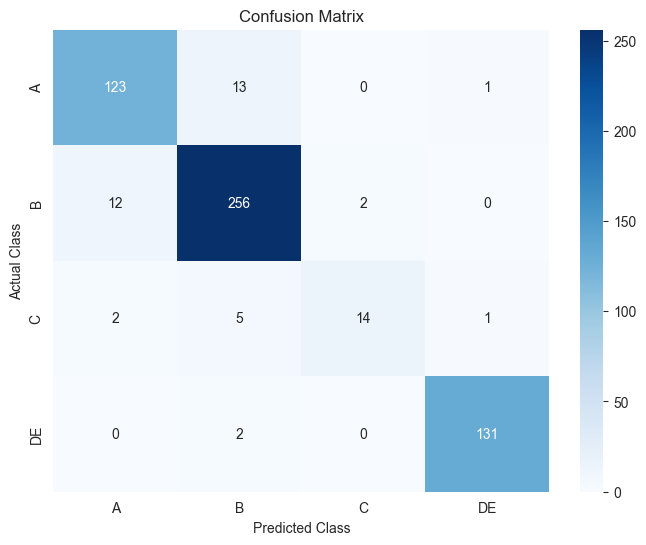

In [3]:
from matplotlib import pyplot as plt

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

In [4]:
import joblib
joblib.dump(rf_classifier, 'Random Forest Joblib/rf_classifier_model.joblib')
joblib.dump(label_encoder, 'Random Forest Joblib/label_encoder.joblib')

['label_encoder.joblib']